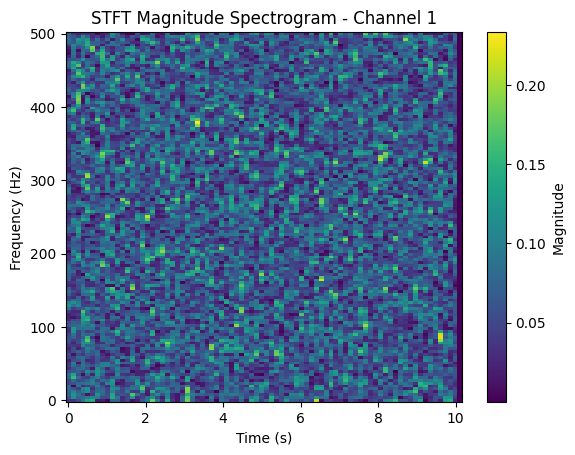

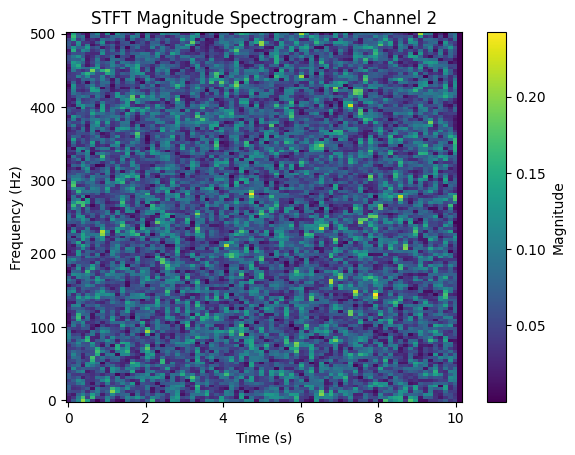

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Assuming you have a 2D input signal and its sample rate
x = np.random.randn(10000, 2)  # Example 2D input signal (2 channels)
sample_rate = 1000  # Sample rate in samples per second

# Define the parameters for the STFT
window = 'hann'  # Windowing function (e.g., Hann window)
nperseg = 256  # Number of samples per segment
noverlap = 128  # Number of overlapping samples between segments

# Compute the STFT for each column (channel)
stft_result = []
for channel in x.T:
    frequencies, times, Zxx = signal.stft(channel, fs=sample_rate, window=window, nperseg=nperseg, noverlap=noverlap)
    stft_result.append(Zxx)

# Convert the STFT result to a NumPy array
stft_result = np.array(stft_result)

# Plot the magnitude spectrogram for each channel
for i in range(stft_result.shape[0]):
    plt.pcolormesh(times, frequencies, np.abs(stft_result[i]), shading='auto')
    plt.colorbar(label='Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title(f'STFT Magnitude Spectrogram - Channel {i+1}')
    plt.show()